# IBM_ML_Chap1_EDA&Hypothesis Testing
*Peer_review_Dataset*

*(Students Performance in Exams from Kaggle)*
*Ref. https://www.kaggle.com/gaganmaahi224/clean-eda-queries-visualization-for-beginners/data 

## Peer review required:
=========
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review.Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

Brief description of the data set and a summary of its attributes

Initial plan for data exploration

Actions taken for data cleaning and feature engineering

Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

Formulating at least 3 hypothesis about this data

Conducting a formal significance test for one of the hypotheses and discuss the results 

Suggestions for next steps in analyzing this data

A paragraph that summarizes the quality of this data set and a request for additional data if needed

# Dataset ==="Students Performance in Exam"

EDA and hypothesis testing (statistics)

## Introduction:
My research is going to be reported to whom? 
**Pretend:
An educational organization/company's boss is going to make decisions about its new marketing approaches more targeted with specific features. Eg. Male / Female students, Students' parents who had different degree of education...**

## EDA

### import library

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [2]:
import missingno as msno

In [3]:
sns.__version__

'0.11.1'

### import dataset

In [3]:
datafile = "data/StudentsPerformance.csv"
df = pd.read_csv(datafile)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### exploring data

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### check missing values

<AxesSubplot:>

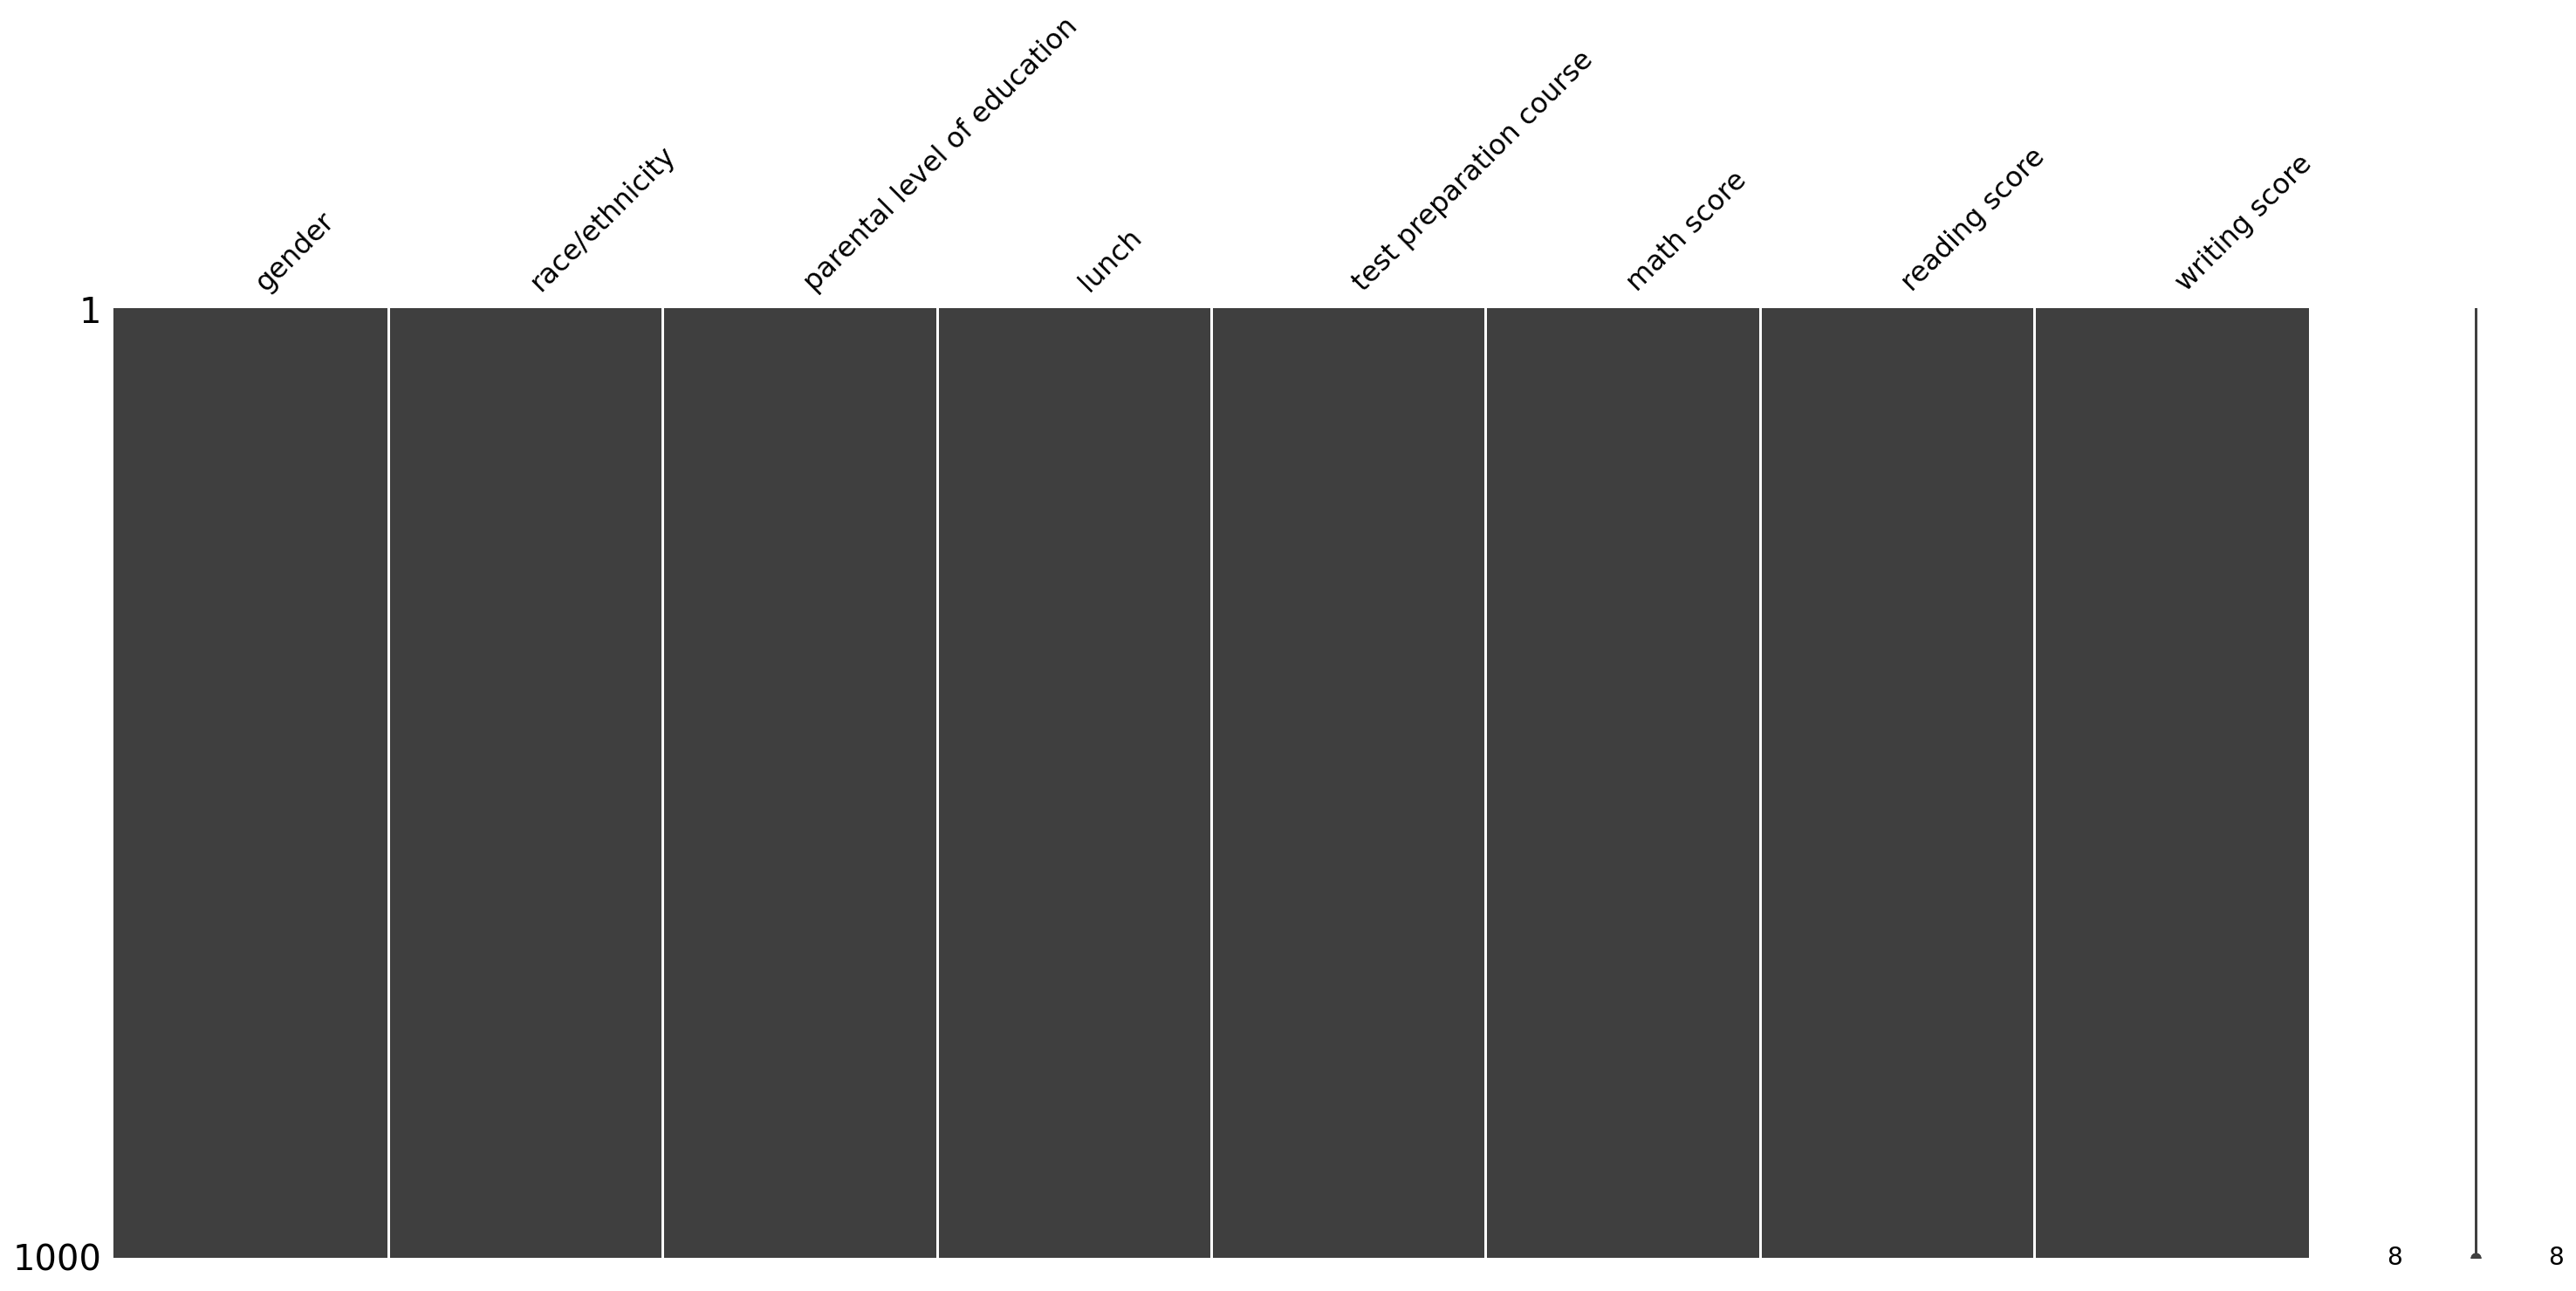

In [7]:
msno.matrix(df) #Check if has missing value

### categorial data  

In [8]:
for i in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
        print(i+' distribution')
        print(df[i].value_counts())
        print('--------------------------------------------------')

gender distribution
female    518
male      482
Name: gender, dtype: int64
--------------------------------------------------
race/ethnicity distribution
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
--------------------------------------------------
parental level of education distribution
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
--------------------------------------------------
lunch distribution
standard        645
free/reduced    355
Name: lunch, dtype: int64
--------------------------------------------------
test preparation course distribution
none         642
completed    358
Name: test preparation course, dtype: int64
--------------------------------------------------


<AxesSubplot:xlabel='test preparation course', ylabel='count'>

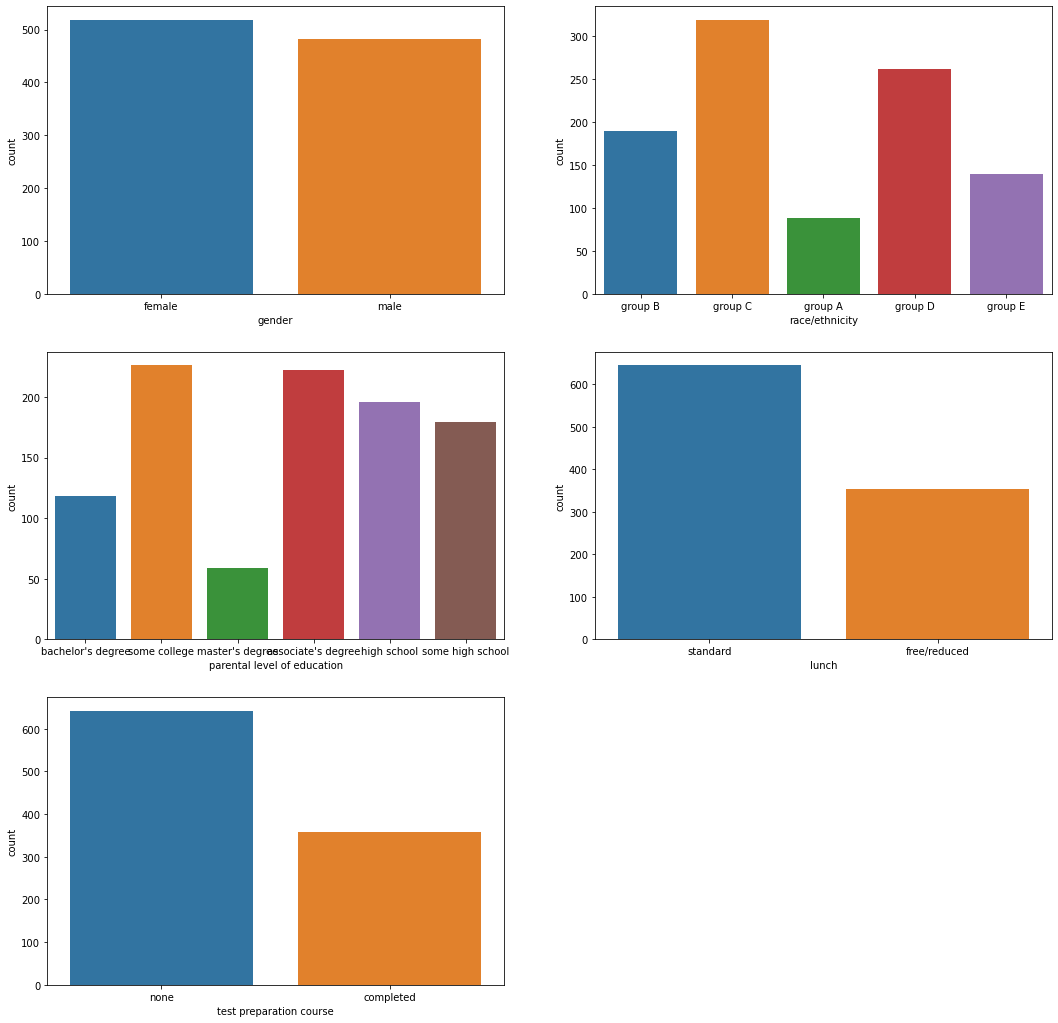

In [8]:
plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
sns.countplot(data = df, x='gender')

plt.subplot(3,2,2)
sns.countplot(data = df, x='race/ethnicity')

plt.subplot(3,2,3)
sns.countplot(data = df, x='parental level of education')

plt.subplot(3,2,4)
sns.countplot(data =df, x='lunch')

plt.subplot(3,2,5)
sns.countplot(data=df, x='test preparation course')

### Numberical data

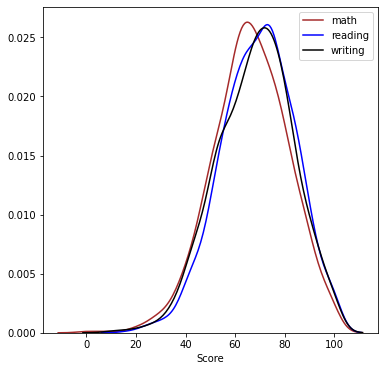

In [7]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['math score'],color='brown')
sns.kdeplot(df['reading score'], color='blue')
sns.kdeplot(df['writing score'], color='black')
plt.xlabel('Score')
plt.ylabel('')
plt.legend(['math', 'reading','writing'])
plt.show()

### correlation between numberical data

In [8]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


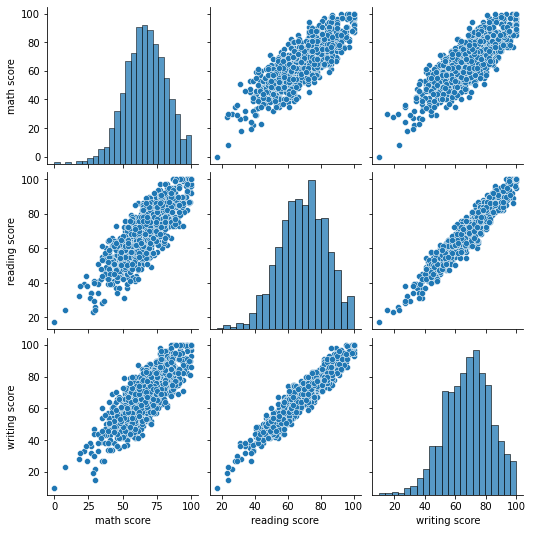

In [9]:
sns.pairplot(df)

### correlation between categorial data

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

gender

In [42]:
df.groupby('gender').mean().style.background_gradient(cmap='OrRd')

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


race.ethnicity

In [4]:
df.groupby(['race/ethnicity']).mean().style.background_gradient(cmap='OrRd')

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


parental level of education

In [5]:
df.groupby(['parental level of education']).mean().style.background_gradient(cmap='PuRd')

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


lunch

In [6]:
df.groupby(['lunch']).mean().style.background_gradient(cmap='Purples')

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


test preparation course

In [7]:
df.groupby(['test preparation course']).mean().style.background_gradient(cmap='Reds')

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Hypothesis Define

### Does the gender difference affect the scores? How is the distribution on gender?

Text(0.5, 1.0, 'Writing score in Violinplot')

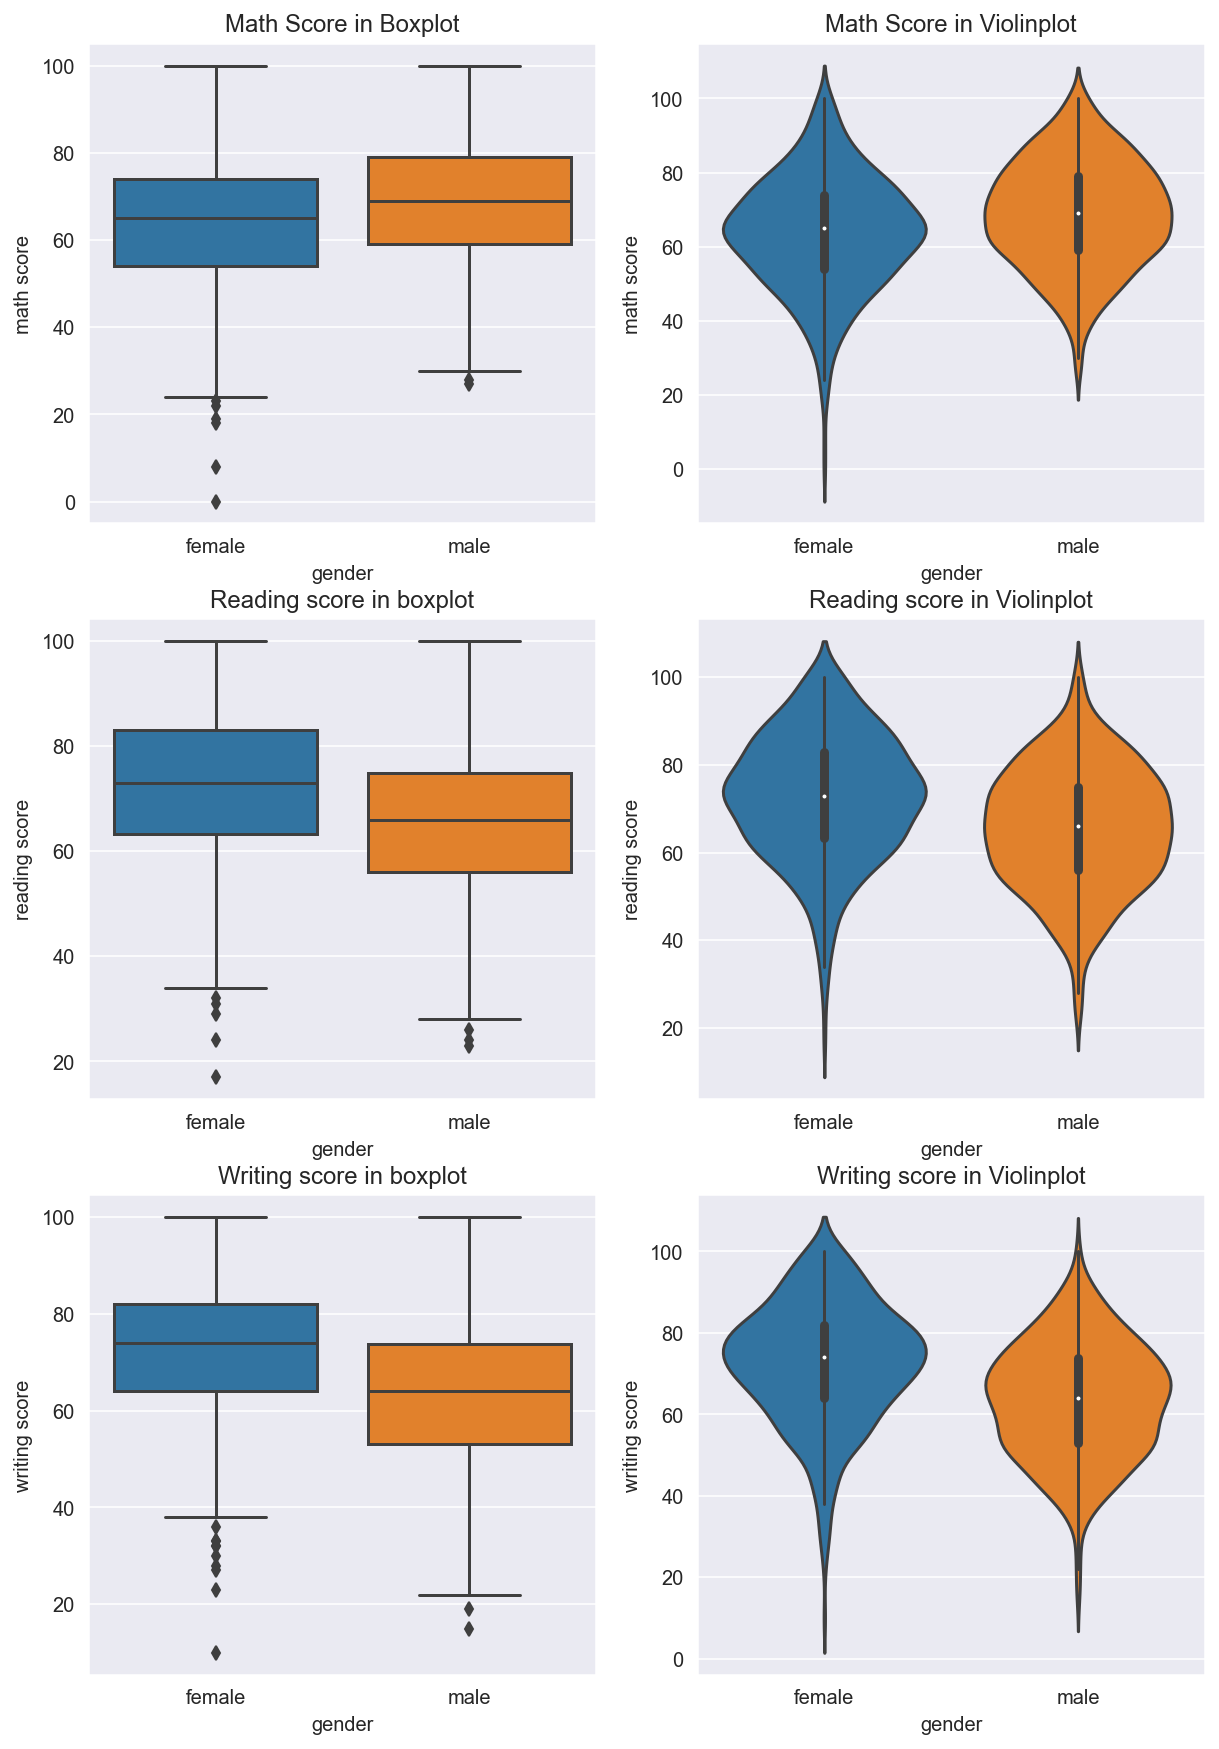

In [13]:
plt.figure(figsize=(10,15))
sns.set_style('darkgrid')

plt.subplot(3,2,1)
sns.boxplot(x='gender',y='math score', data=df)
plt.title('Math Score in Boxplot')

plt.subplot(3,2,2)
sns.violinplot(x='gender',y='math score', data=df)
plt.title('Math Score in Violinplot')

plt.subplot(3,2,3)
sns.boxplot(x='gender',y='reading score', data=df)
plt.title('Reading score in boxplot')

plt.subplot(3,2,4)
sns.violinplot(x='gender',y='reading score', data=df)
plt.title('Reading score in Violinplot')

plt.subplot(3,2,5)
sns.boxplot(x='gender',y='writing score',data=df)
plt.title('Writing score in boxplot')

plt.subplot(3,2,6)
sns.violinplot(x='gender',y='writing score', data=df)
plt.title('Writing score in Violinplot')

### Hypothesis testing 1 -- Gender / Scores
H0:There is no impacts on scores if different in gender.
***************
H1:There is having impacts on scores if different in gender.

In [7]:
df_m = df[df['gender']=='male']
df_f = df[df['gender']=='female']
df_f.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


**T-test on gender (male & female 2 independent variables) on math score:**

In [8]:
scipy.stats.ttest_ind(df_f['math score'],df_m['math score'],equal_var=False)

Ttest_indResult(statistic=-5.398000564160736, pvalue=8.420838109090415e-08)

As P value < 0.05, therefore reject H0 and accept H1, which is there is difference between gender on math score. From the average score, male on math is considered better than female.

**T-test on gender (male & female 2 independent variables) on reading score:**

In [9]:
scipy.stats.ttest_ind(df_f['reading score'],df_m['reading score'],equal_var=False)

Ttest_indResult(statistic=7.9683565184844, pvalue=4.3762967534976715e-15)

As P value < 0.05, therefore reject H0 and accept H1, which is there is difference between gender on reading score. From the average score, female on reading is considered better than male.

**T-test on gender (male & female 2 independent variables) on writing score:**

In [10]:
scipy.stats.ttest_ind(df_f['writing score'],df_m['writing score'],equal_var=False)

Ttest_indResult(statistic=9.997718973491885, pvalue=1.7118093718497237e-22)

As P value < 0.05, therefore reject H0 and accept H1, which is there is difference between gender on writing score. From the average score, female on writing is considered better than male.

### Does the parental level of education affact student scores? How does it distributed?

### Hypothesis testing 2 -- Parental level of education / Scores

H0:There is no impacts on scores if different in parental level of education.
***************
H1:There is having impacts on scores if different parental level of education.

In [16]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

#### Data cleaning of Parental level of education --> change into 3 values (high school, bachelor, master)

In [9]:
df2=df.copy()
df2['parental level of education'] = df2['parental level of education'].replace({"some college":"bachelor",
                                          "associate's degree":"bachelor", 
                                          "some high school":"high school",
                                         "bachelor's degree":"bachelor",
                                         "master's degree":"master"})
df2['parental level of education'].value_counts()

bachelor       566
high school    375
master          59
Name: parental level of education, dtype: int64

Text(0.5, 1.0, 'Writing score in Violinplot')

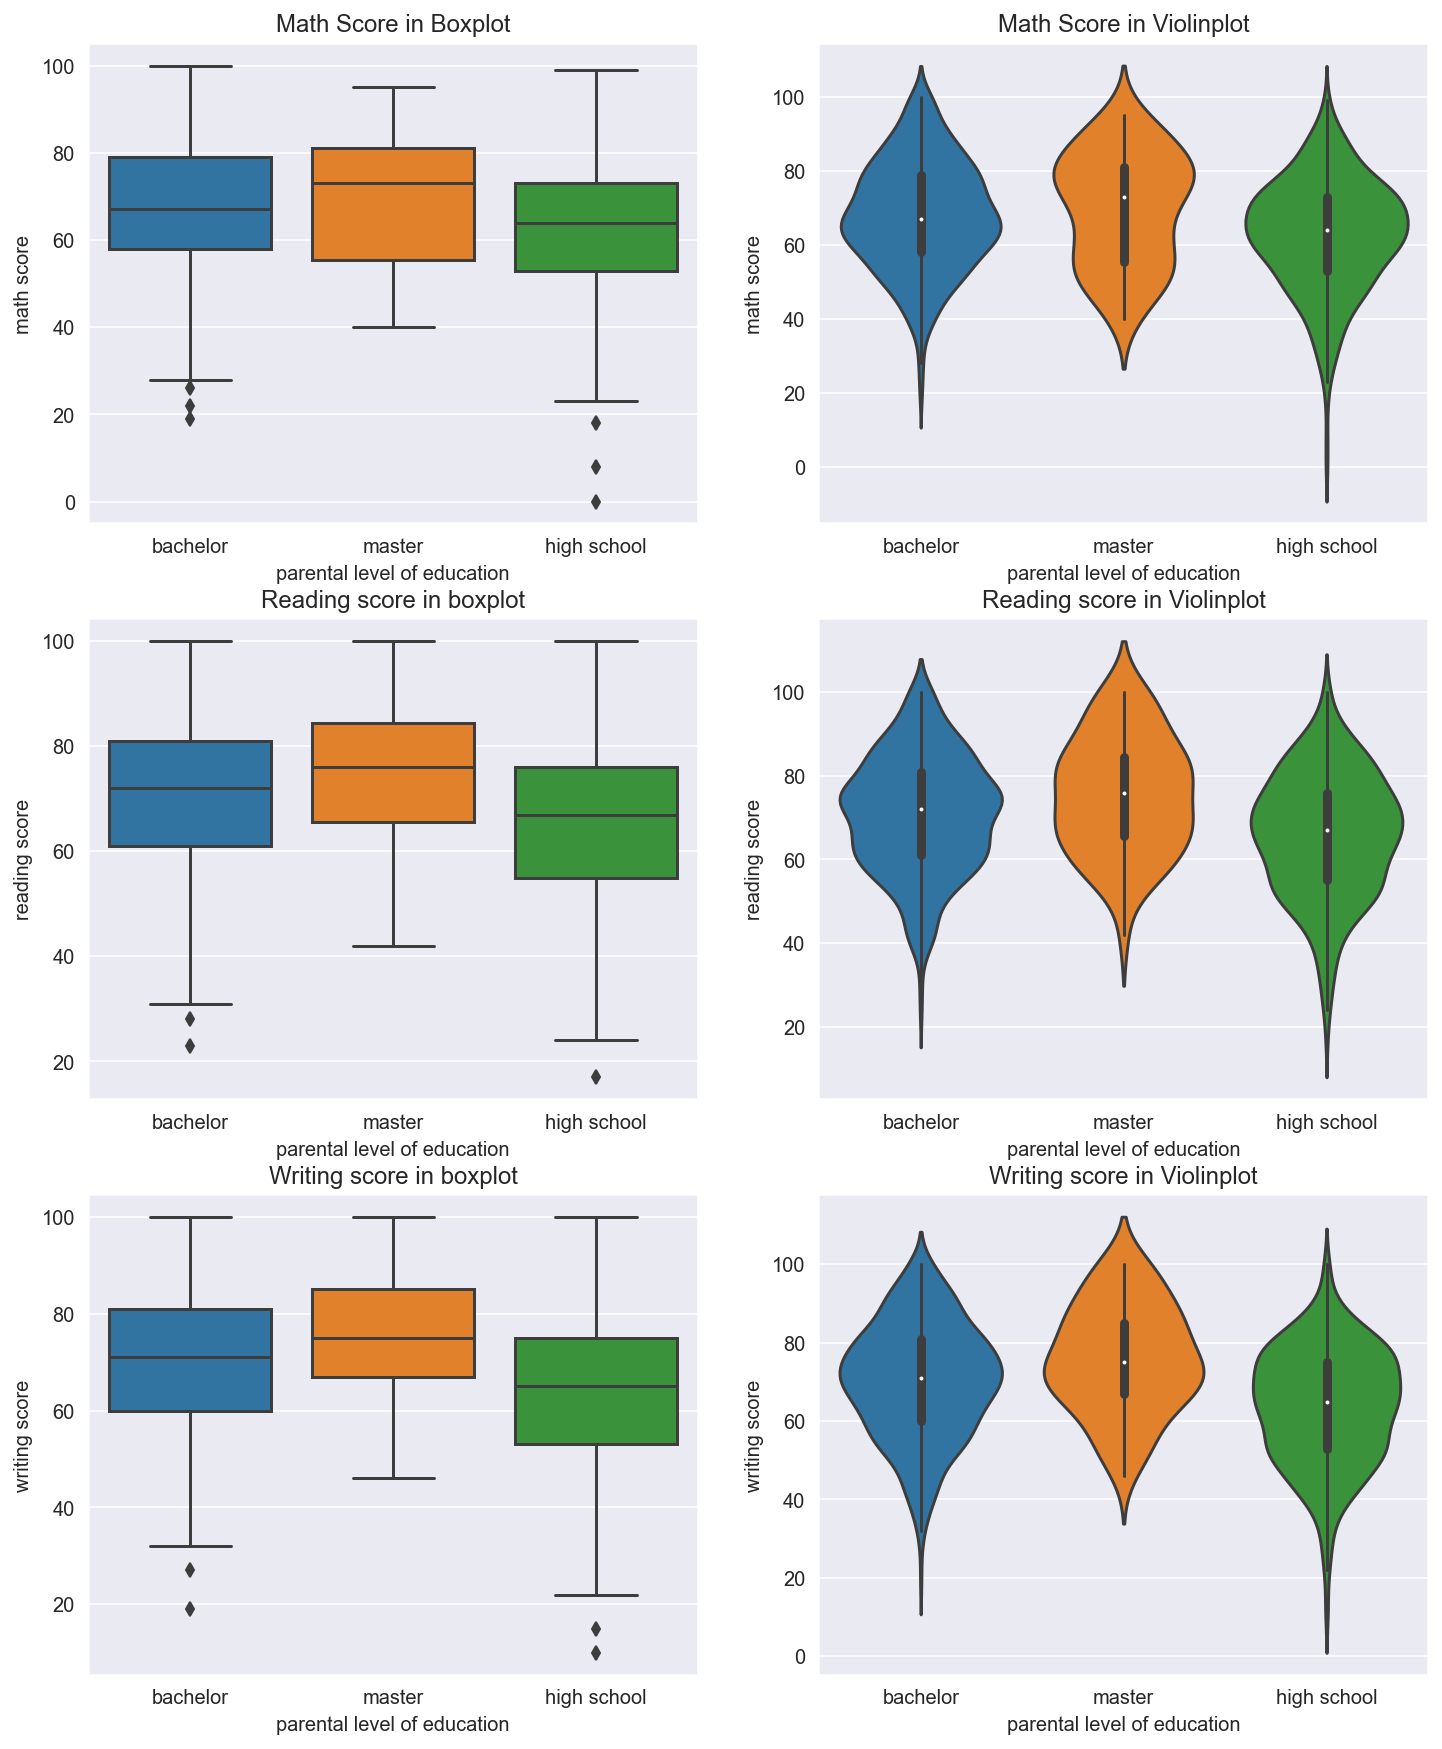

In [15]:
plt.figure(figsize=(12,15))
sns.set_style('darkgrid')

plt.subplot(3,2,1)
sns.boxplot(x='parental level of education',y='math score', data=df2)
plt.title('Math Score in Boxplot')

plt.subplot(3,2,2)
sns.violinplot(x='parental level of education',y='math score', data=df2)
plt.title('Math Score in Violinplot')

plt.subplot(3,2,3)
sns.boxplot(x='parental level of education',y='reading score', data=df2)
plt.title('Reading score in boxplot')

plt.subplot(3,2,4)
sns.violinplot(x='parental level of education',y='reading score', data=df2)
plt.title('Reading score in Violinplot')

plt.subplot(3,2,5)
sns.boxplot(x='parental level of education',y='writing score',data=df2)
plt.title('Writing score in boxplot')

plt.subplot(3,2,6)
sns.violinplot(x='parental level of education',y='writing score', data=df2)
plt.title('Writing score in Violinplot')

In [10]:
df2.groupby(['parental level of education']).mean().style.background_gradient(cmap='PuRd')

,math score,reading score,writing score
parental level of education,,,
bachelor,67.895760,70.773852,70.201413
high school,62.786667,65.770667,63.613333
master,69.745763,75.372881,75.677966


In [25]:
df2_ba = df2[df2['parental level of education']=='bachelor'] #parent has bachelor degree
df2_ma = df2[df2['parental level of education']=='master'] #parent has master degree
df2_hi = df2[df2['parental level of education']=='high school'] #parent has high school education

#### Parental level of education vs. Math score

**T-test on parent is bachelor or master level of education has impact on student math score.**

In [26]:
scipy.stats.ttest_ind(df2_ba['math score'],df2_ma['math score'], equal_var=False)

Ttest_indResult(statistic=-0.8945328727367031, pvalue=0.3741037356058158)

As p-value > 0.05, so accept H0 (Either parental level of education is bachelor or master, no significant impact on student math score.

**T-test on parent is high school or master level of education has impact on student math score.**

In [27]:
scipy.stats.ttest_ind(df2_hi['math score'],df2_ma['math score'], equal_var=False)

Ttest_indResult(statistic=-3.277139142603498, pvalue=0.0015702752093248236)

As p-value<0.05, so accept H1. Parental level of education in master has positive impact on student math score than whose parent has high school education.

**T-test on parent is high school or bachelor level of education has impact on student math score.**

In [28]:
scipy.stats.ttest_ind(df2_hi['math score'],df2_ba['math score'], equal_var=False)

Ttest_indResult(statistic=-5.103857329611522, pvalue=4.179301907606294e-07)

As p-value<0.05, so accept H1. Parental level of education in bachelor has positive impact on student math score than whose parent has high school education.

#### Parental level of education vs. Reading score

In [29]:
scipy.stats.ttest_ind(df2_ba['reading score'],df2_ma['reading score'], equal_var=False)

Ttest_indResult(statistic=-2.4354734401838174, pvalue=0.01737773810566553)

In [30]:
scipy.stats.ttest_ind(df2_hi['reading score'],df2_ma['reading score'], equal_var=False)

Ttest_indResult(statistic=-4.924988125014135, pvalue=4.412639124360135e-06)

In [31]:
scipy.stats.ttest_ind(df2_hi['reading score'],df2_ba['reading score'], equal_var=False)

Ttest_indResult(statistic=-5.174732319236381, pvalue=2.9123773693658355e-07)

Conclustion: From above t-test, all p-valus<0.05, which means reject H0 and recept H1. The parental level of education has significant impact on student reading scores.

#### Parental level of education vs. Writing score

In [32]:
scipy.stats.ttest_ind(df2_ba['writing score'],df2_ma['writing score'], equal_var=False)

Ttest_indResult(statistic=-2.894432095872074, pvalue=0.005011521767456111)

In [33]:
scipy.stats.ttest_ind(df2_hi['writing score'],df2_ma['writing score'], equal_var=False)

Ttest_indResult(statistic=-6.1975271886286105, pvalue=2.2580401650022226e-08)

In [34]:
scipy.stats.ttest_ind(df2_ba['writing score'],df2_hi['writing score'], equal_var=False)

Ttest_indResult(statistic=6.659413040259989, pvalue=5.129182719510424e-11)

Conclustion: From above t-test, p-valus between bachelor and master is >0.05, which means accept H0. The parental level of education in master or bachelor has no significant impact on student writing scores.
However, high school vs. master, high school vs. bachelor both have p-value<0.05. So accept H1, there is significant impact on student writing scores if parental level of education is high school education.

### Hypothesis test 3 -- Lunch / Scores

H0:There is no impacts on scores if different in lunch.
***************
H1:There is having impacts on scores if different lunch.

In [35]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [36]:
df_fl = df[df['lunch']=='free/reduced']
df_sl = df[df['lunch']=='standard']
df_sl

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
987,male,group E,some high school,standard,completed,81,75,76
991,female,group B,some high school,standard,completed,65,82,78
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95


Text(0.5, 1.0, 'Writing score in Violinplot')

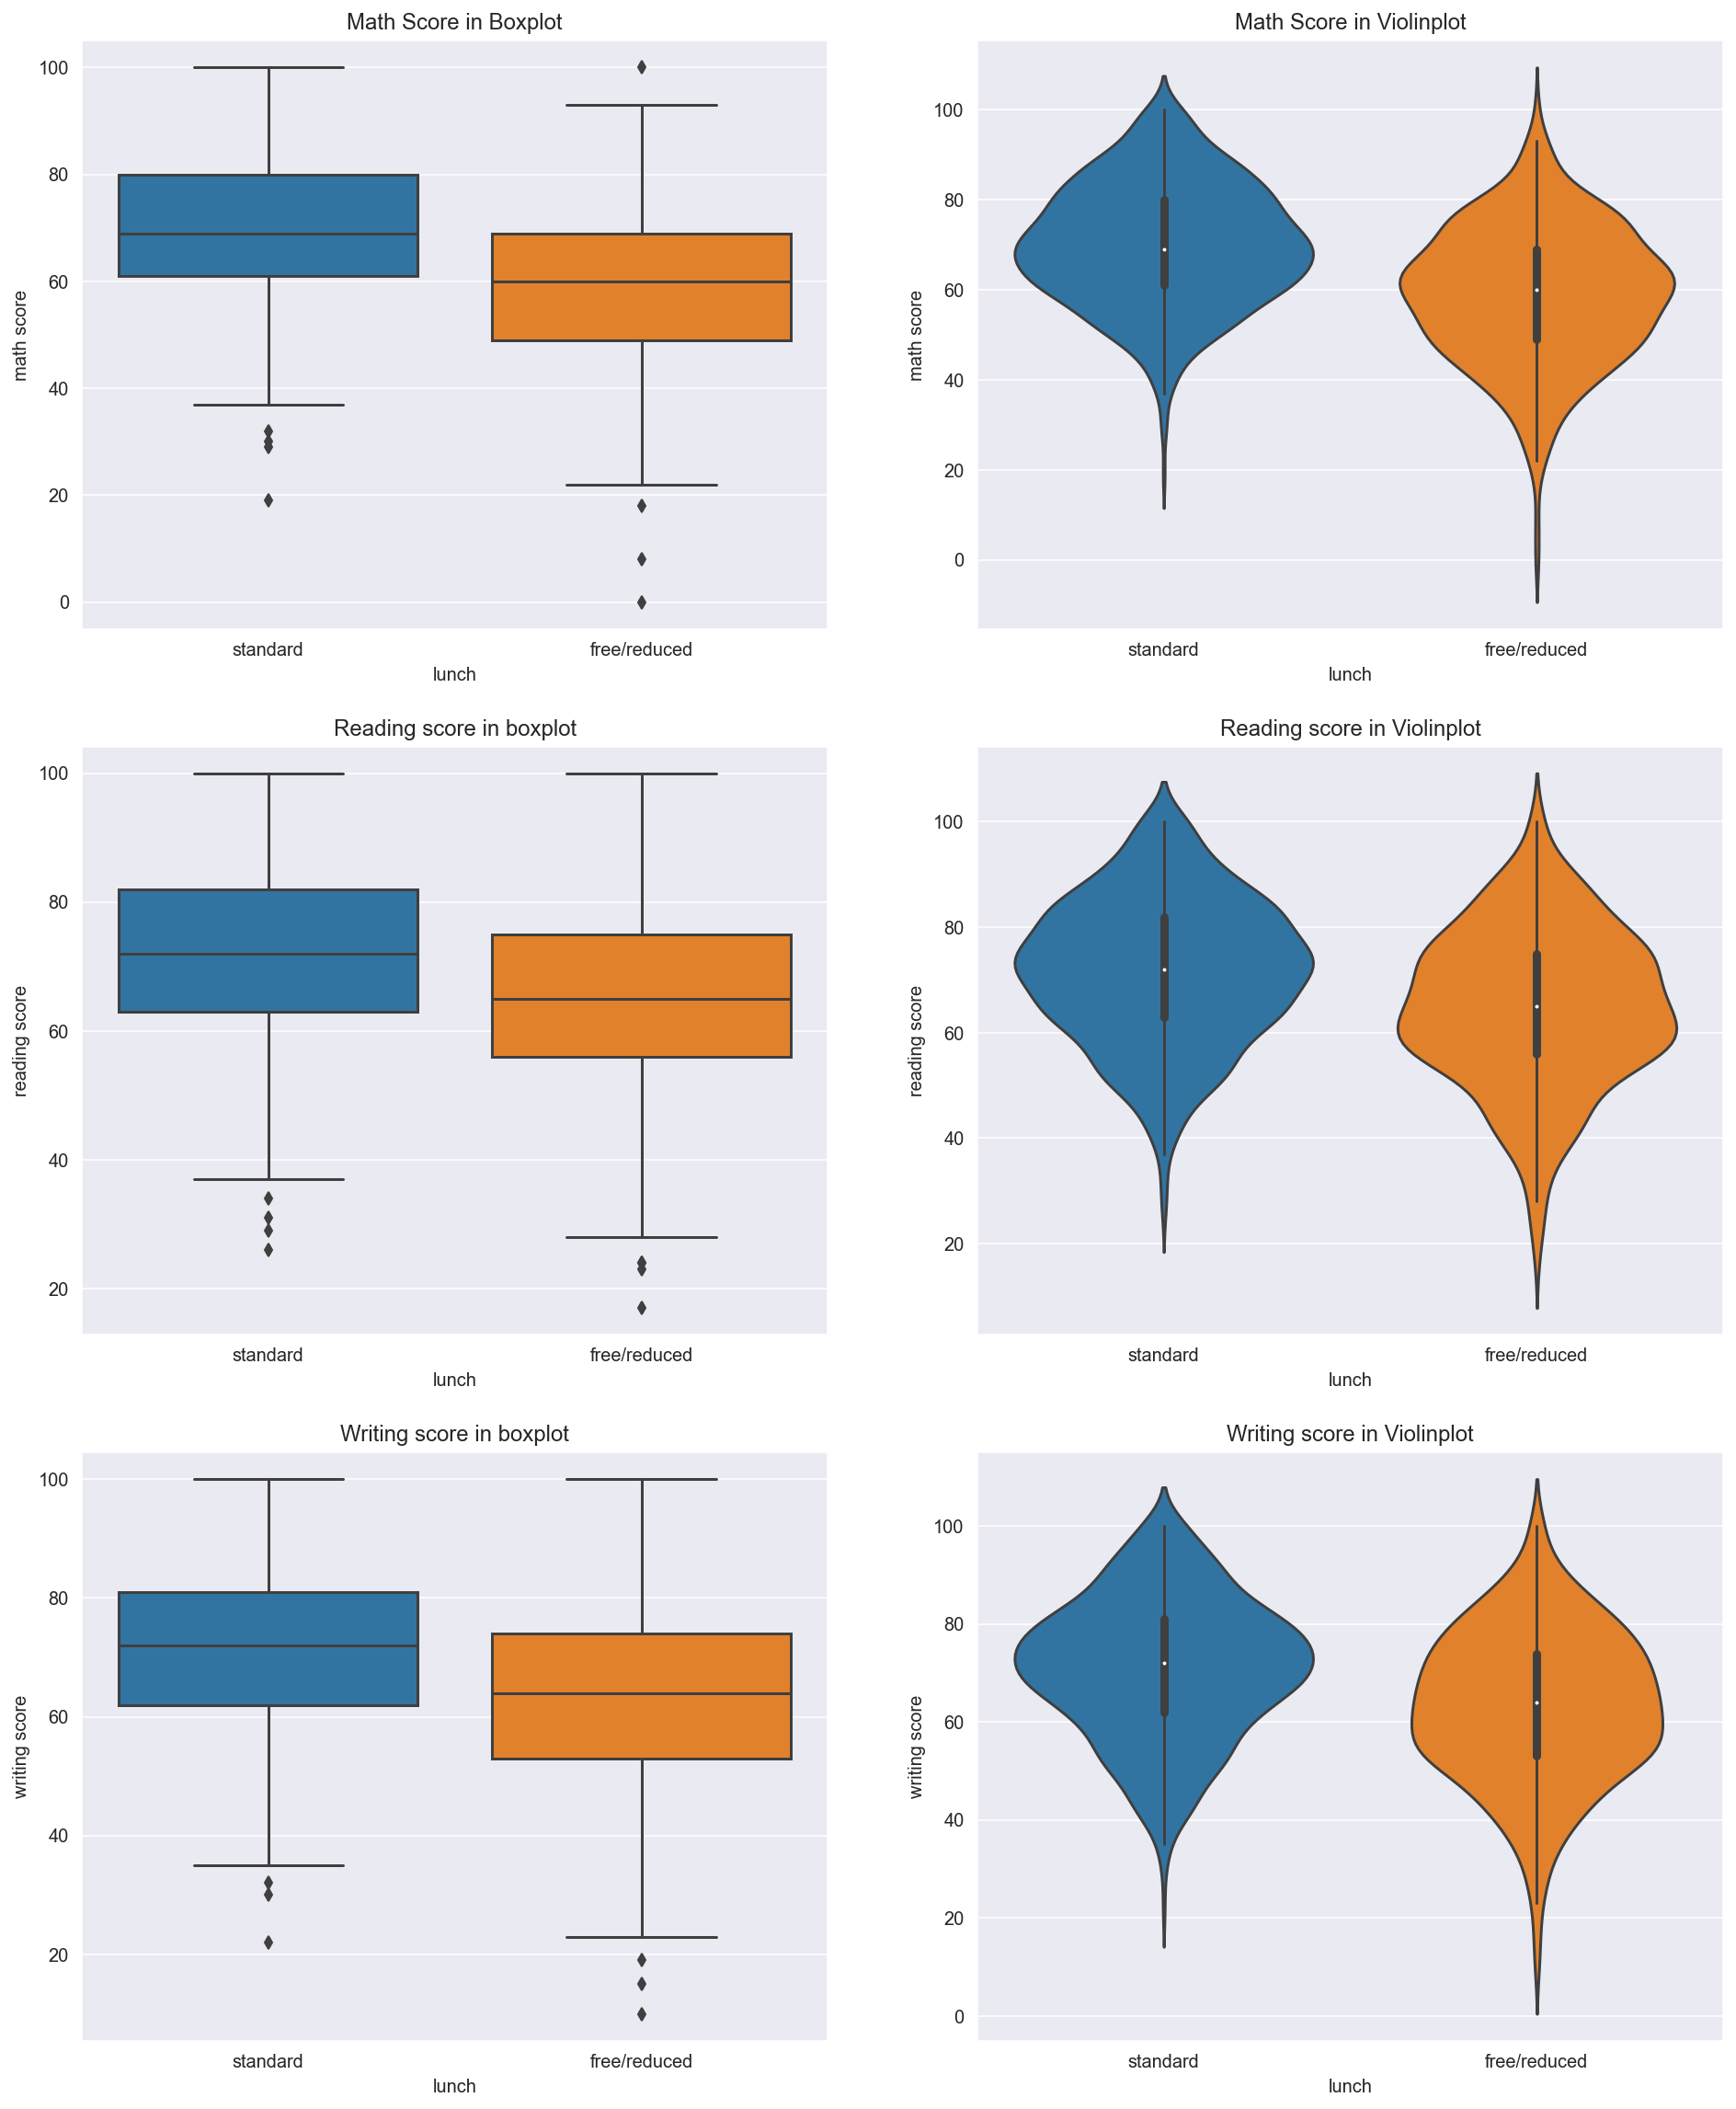

In [38]:
plt.figure(figsize=(16,20))
sns.set_style('darkgrid')

plt.subplot(3,2,1)
sns.boxplot(x='lunch',y='math score', data=df)
plt.title('Math Score in Boxplot')

plt.subplot(3,2,2)
sns.violinplot(x='lunch',y='math score', data=df)
plt.title('Math Score in Violinplot')

plt.subplot(3,2,3)
sns.boxplot(x='lunch',y='reading score', data=df)
plt.title('Reading score in boxplot')

plt.subplot(3,2,4)
sns.violinplot(x='lunch',y='reading score', data=df)
plt.title('Reading score in Violinplot')

plt.subplot(3,2,5)
sns.boxplot(x='lunch',y='writing score',data=df)
plt.title('Writing score in boxplot')

plt.subplot(3,2,6)
sns.violinplot(x='lunch',y='writing score', data=df)
plt.title('Writing score in Violinplot')

T-test on lunch vs. math score, reading score, writing score (H0: No impact on score if lunch is free or standard.)

In [39]:
scipy.stats.ttest_ind(df_fl['math score'],df_sl['math score'],equal_var=False)

Ttest_indResult(statistic=-11.484100293169273, pvalue=5.539584943965394e-28)

In [40]:
scipy.stats.ttest_ind(df_fl['reading score'],df_sl['reading score'],equal_var=False)

Ttest_indResult(statistic=-7.29261459119927, pvalue=8.421688691948049e-13)

In [41]:
scipy.stats.ttest_ind(df_fl['writing score'],df_sl['writing score'],equal_var=False)

Ttest_indResult(statistic=-7.840866279153781, pvalue=1.7161468025322293e-14)

Conclusion: All p-value<0.05, reject H0 and accept H1. There is signicant impact on scores if lunch is free or standard. In particular, with standard lunch students have greater scores than free lunch students.

### More to research

From above three hypothesis test, if data gathering parents' infomation, such as annual revenue, occupations will help to locate more targets and improve students' scores. From the lunch is free/standard feature, it need more evidence to prove that economic situation of parents will affect student score performances. Also, parents with high school education level also affect the children scores which have space for company to show/educate targeted parents pay more attentions on improving student scores and higher level of education in future.